# XOHW21 - Fake News Detection

# Possible Algorithms to use in the Fake News Detection Task

# Multi layered Perceptron Classifier

Models taken from: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

## Fake News Detection using  simple fake news dataset

In [20]:
import numpy as np
import pandas as pd
import itertools
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

In [21]:
print(os.getcwd())

C:\Users\User\Documents\Python_Scripts\Fake-News-Detection\models


In [22]:
#Read the data
df=pd.read_csv('../news.csv')
#Get shape and head
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [23]:
#DataFlair - Get the labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [27]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [28]:
%%time
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

Wall time: 2.89 s


In [29]:
%%time
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(tfidf_train, y_train)

Wall time: 3.92 s


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [30]:
%%time
y_pred=clf.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.34%
Wall time: 5 ms


In [31]:
%%time
#DataFlair - Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

Wall time: 3 ms


array([[583,  55],
       [ 42, 587]], dtype=int64)

## Fake News Detection using ISOT Fake News Dataset

The Fake News Dataset can be found here: https://www.uvic.ca/engineering/ece/isot/datasets/fake-news/index.php

In [32]:
import numpy as np
import pandas as pd
import itertools
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
from datetime import datetime
import pickle
import sys
from hurry.filesize import size

In [33]:
#Load the respective data
df_fake=pd.read_csv('../isot_dataset/Fake.csv')
df_true=pd.read_csv('../isot_dataset/True.csv')

In [34]:
# Check true data
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [35]:
# Check true data info
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [36]:
# Check true data for missing values
df_true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [37]:
# Check fake data
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [38]:
# Check fake data info
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [39]:
# Check fake data for missing values
df_fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

## Data Preprocessing

In [40]:
# add a target class column to indicate whether the news is real or fake
df_true['isfake'] = 1

# Check data
df_true.head()

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [41]:
# add a target class column to indicate whether the news is real or fake
df_fake['isfake'] = 0

# Check data
df_fake.head()

,title,text,subject,date,isfake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [42]:
# Concatenate Real and Fake News
df = pd.concat([df_true, df_fake]).reset_index(drop = True)

In [43]:
# Check data
df.head()

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [44]:
# Check data
df.tail()

,title,text,subject,date,isfake
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [45]:
# Drop column
df.drop(columns = ['date'], inplace = True)

In [46]:
# Combine title and text together
df['original'] = df['title'] + ' ' + df['text']
df.head()

,title,text,subject,isfake,original
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,Trump wants Postal Service to charge 'much mor...


In [47]:
# Check data sample
df['original'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

In [48]:
#DataFlair - Get the labels
labels=df.isfake
labels.head()

0    1
1    1
2    1
3    1
4    1
Name: isfake, dtype: int64

In [49]:
labels.tail()

44893    0
44894    0
44895    0
44896    0
44897    0
Name: isfake, dtype: int64

In [76]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['original'], labels, test_size=0.2, random_state=7)

In [77]:
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

(35918,) (35918,) (8980,) (8980,)


## Validation Set Creation (For hold-out validation)

In [78]:
#DataFlair - Split the dataset intro Training set and Validation set
x_train ,x_val ,y_train ,y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=7)

In [79]:
print(x_train.shape, y_train.shape,x_val.shape, y_val.shape)

(28734,) (28734,) (7184,) (7184,)


In [80]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_val=tfidf_vectorizer.transform(x_val)

In [81]:
%%time
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=100, random_state=1)

clf.fit(tfidf_train, y_train)

#DataFlair - Predict on the validation set and calculate accuracy
y_pred_val=clf.predict(tfidf_val)
score=accuracy_score(y_val,y_pred_val)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 99.29%
Wall time: 3min 10s


In [82]:
#DataFlair - Build confusion matrix
confusion_matrix(y_val,y_pred_val, labels=[0,1])

array([[3782,   21],
       [  30, 3351]], dtype=int64)

In [83]:
print("Number of mislabeled points out of a total %d points : %d" % (x_val.shape[0], (y_val != y_pred_val).sum()))

Number of mislabeled points out of a total 7184 points : 51


In [84]:
class_names = np.array([0, 1],dtype=object) #Classes as seen in the Dataset: 0 means Fake News, 1 means Real News.
print(class_names)

[0 1]


In [85]:
real_labels = ["Fake", "Real"]
real_labels

['Fake', 'Real']

Confusion matrix, without normalization
[[3782   21]
 [  30 3351]]
Normalized confusion matrix
[[0.99447804 0.00552196]
 [0.00887311 0.99112689]]


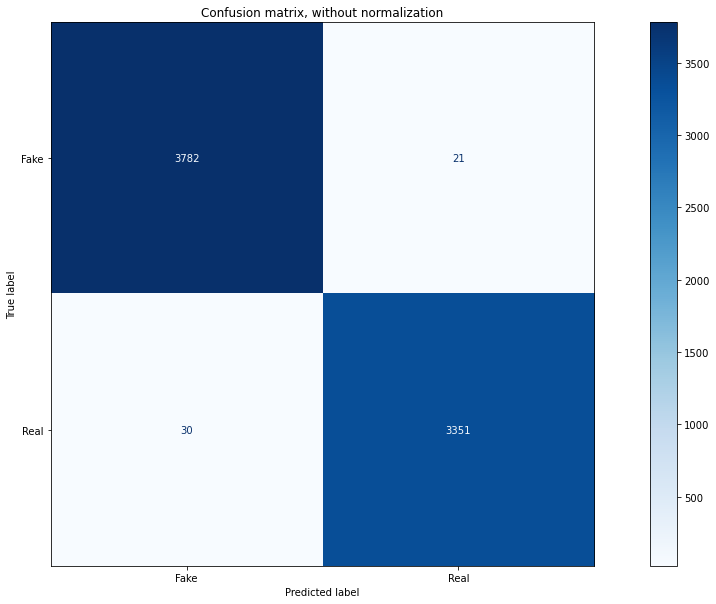

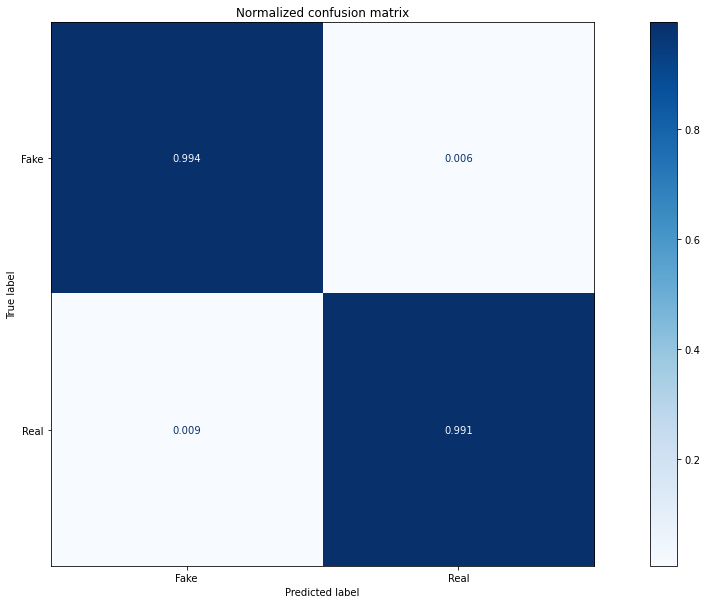

In [86]:
# Plot confusion matrix 
plt.rcParams["figure.figsize"] = (20,10)


titles_options = [("Confusion matrix, without normalization", None,''),
                  ("Normalized confusion matrix", 'true','.3f')]
for title, normalize, format in titles_options:
    disp = plot_confusion_matrix(clf, tfidf_val, y_val,
                                 labels=class_names, #labels as seen in the Dataset; 0: Fake News, 1: Real News
                                 cmap=plt.cm.Blues,
                                 normalize=normalize, values_format=format,)
    disp.ax_.set_title(title)
    disp.ax_.set_xticklabels(real_labels)
    disp.ax_.set_yticklabels(real_labels)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Hyperparameter tuning

In [30]:
%%time 
max_accuracy = -1
c_range = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000] #first test.
#c_range = np.arange(250, 1000.1, 50) Second test that will explore in depth the parameter found in the first test.
for option in c_range:
    
    #DataFlair - Initialize a Multinomial Naive Bayes Classifier
    clf = PassiveAggressiveClassifier(random_state=0, max_iter=1000, C=option)
    clf.fit(tfidf_train,y_train)

    #DataFlair - Predict on the validation set and calculate accuracy
    y_pred_val=clf.predict(tfidf_val)
    score=accuracy_score(y_val,y_pred_val)
    print(f'Accuracy: {round(score*100,2)}%')
    
    if score > max_accuracy:
        max_accuracy = score
        best_model = clf
    print("Option: ", option, "Accuracy: ", score)

print("Max accuracy: ", max_accuracy, " with best model: ", best_model)

Accuracy: 90.62%
Option:  1e-06 Accuracy:  0.9061804008908686
Accuracy: 90.69%
Option:  1e-05 Accuracy:  0.9068763919821826
Accuracy: 94.72%
Option:  0.0001 Accuracy:  0.9472438752783965
Accuracy: 97.9%
Option:  0.001 Accuracy:  0.9789810690423163
Accuracy: 99.26%
Option:  0.01 Accuracy:  0.9926224944320713
Accuracy: 99.62%
Option:  0.1 Accuracy:  0.9962416481069042
Accuracy: 99.62%
Option:  1 Accuracy:  0.9962416481069042
Accuracy: 99.61%
Option:  10 Accuracy:  0.9961024498886414
Accuracy: 99.61%
Option:  100 Accuracy:  0.9961024498886414
Accuracy: 99.61%
Option:  1000 Accuracy:  0.9961024498886414
Accuracy: 99.61%
Option:  10000 Accuracy:  0.9961024498886414
Accuracy: 99.61%
Option:  100000 Accuracy:  0.9961024498886414
Accuracy: 99.61%
Option:  1000000 Accuracy:  0.9961024498886414
Max accuracy:  0.9962416481069042  with best model:  PassiveAggressiveClassifier(C=0.1, random_state=0)
Wall time: 11.9 s


In [31]:
print(best_model)
best_model_dict = best_model.get_params()

PassiveAggressiveClassifier(C=0.1, random_state=0)


## Writing the Best model parameters to a log file

In [32]:
now = datetime.now()

# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")

with open('hyperparametertuning_logs.txt', 'a') as f:
    print("Best model found at:",dt_string, file=f)
    print("With accuracy:",max_accuracy, file=f)
    print("PassiveAggressiveClassifier Model with parameters: ", file=f)
    print(best_model_dict, file=f)

In [87]:
best_model = clf

## Model Prediction

In [88]:
#Use Saved Best Model from before and Predict on the test set and calculate accuracy.
tfidf_test = tfidf_vectorizer.transform(x_test)
y_pred_test=best_model.predict(tfidf_test)
score=accuracy_score(y_test,y_pred_test)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 99.4%


In [89]:
#DataFlair - Build confusion matrix
confusion_matrix(y_test,y_pred_test, labels=[0,1])

array([[4650,   25],
       [  29, 4276]], dtype=int64)

Confusion matrix, without normalization
[[4646   29]
 [  35 4270]]
Normalized confusion matrix
[[0.99379679 0.00620321]
 [0.00813008 0.99186992]]


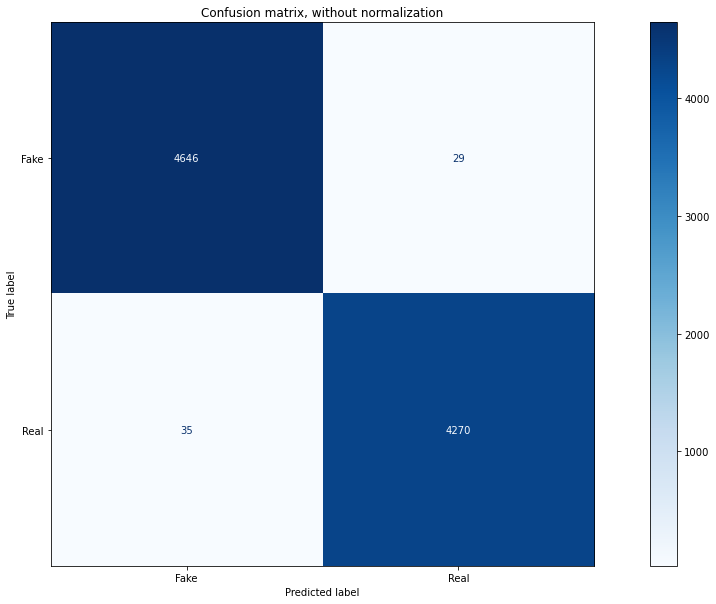

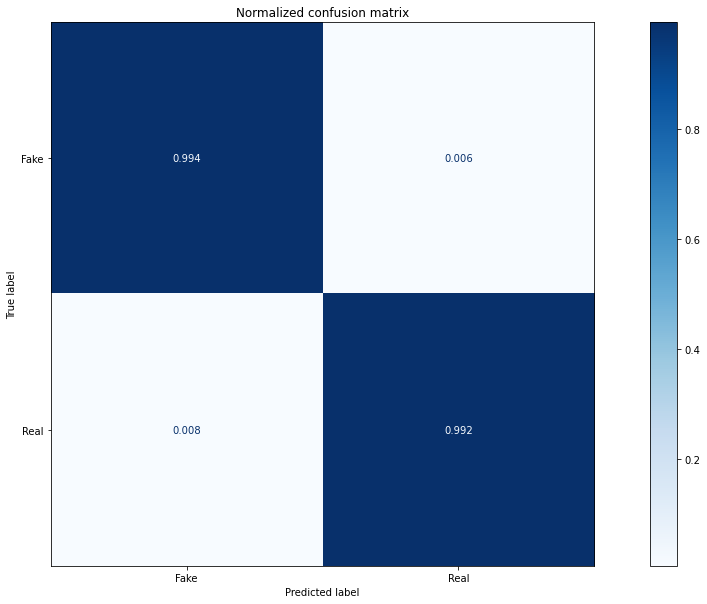

In [75]:
# Plot confusion matrix 
plt.rcParams["figure.figsize"] = (20,10)


titles_options = [("Confusion matrix, without normalization", None,''),
                  ("Normalized confusion matrix", 'true','.3f')]
for title, normalize, format in titles_options:
    disp = plot_confusion_matrix(best_model, tfidf_test, y_test,
                                 labels=class_names, #labels as seen in the Dataset; 0: Fake News, 1: Real News
                                 cmap=plt.cm.Blues,
                                 normalize=normalize, values_format=format,)
    disp.ax_.set_title(title)
    disp.ax_.set_xticklabels(real_labels)
    disp.ax_.set_yticklabels(real_labels)

    print(title)
    print(disp.confusion_matrix)

plt.show()